## Feature Selection 

Derive electrophysiologcial features for modelling

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import shapiro

In [2]:
# Load electrophysiological data
df_electro = pd.read_excel('../Data/Electro_data_WT_KO_21112025.xlsx', index_col=0)

In [3]:
# Check
num_WT = df_electro[df_electro['Genotype'] == 'WT'].shape[0]
num_KO = df_electro[df_electro['Genotype'] == 'Nav1.2 KO'].shape[0]

print(df_electro.shape)
print(f'Number of WT neurons: {num_WT}')
print(f'Number of KO neurons: {num_KO}')
print(df_electro.info())

(161, 15)
Number of WT neurons: 101
Number of KO neurons: 56
<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 2023_03_15_Cell2 to 2025_04_01_C7
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genotype              157 non-null    object 
 1   AP Threshold (mV)     153 non-null    object 
 2   AP amplitude (mV)     154 non-null    object 
 3   AP half-width (ms)    154 non-null    object 
 4   AP max rise (mV/ms)   154 non-null    object 
 5   AP max decay (mV/ms)  154 non-null    object 
 6   AP IS peak (mV/ms2)   146 non-null    object 
 7   AP SD peak (mV/ms2)   152 non-null    float64
 8   AHP (mV)              153 non-null    object 
 9   AHP latency (ms)      154 non-null    object 
 10  ISIavg (s)            142 non-null    object 
 11  SD ISI                135 non-null    object 
 12  CV ISI (%)            145 non-null    object 
 13  Sag amplitude (mV)    155 non-null    float6

In [4]:
# Preprocess
df_electro=df_electro.dropna()
df_electro['Genotype'] = df_electro['Genotype'].astype('category')
for col in df_electro.columns:
    if col != 'Genotype':
        df_electro[col] = pd.to_numeric(df_electro[col], errors='coerce')

In [5]:
# Double-Check
num_WT = df_electro[df_electro['Genotype'] == 'WT'].shape[0]
num_KO = df_electro[df_electro['Genotype'] == 'Nav1.2 KO'].shape[0]

print(df_electro.shape)
print(f'Number of WT neurons: {num_WT}')
print(f'Number of KO neurons: {num_KO}')
print(df_electro.info())

(114, 15)
Number of WT neurons: 76
Number of KO neurons: 38
<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2023_03_16_Cell1 to 2025_04_01_C7
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Genotype              114 non-null    category
 1   AP Threshold (mV)     114 non-null    float64 
 2   AP amplitude (mV)     114 non-null    float64 
 3   AP half-width (ms)    113 non-null    float64 
 4   AP max rise (mV/ms)   114 non-null    float64 
 5   AP max decay (mV/ms)  114 non-null    float64 
 6   AP IS peak (mV/ms2)   111 non-null    float64 
 7   AP SD peak (mV/ms2)   114 non-null    float64 
 8   AHP (mV)              114 non-null    float64 
 9   AHP latency (ms)      114 non-null    float64 
 10  ISIavg (s)            113 non-null    float64 
 11  SD ISI                113 non-null    float64 
 12  CV ISI (%)            113 non-null    float64 
 13  Sag amplitude (mV)    114 non-

In [6]:
# Group stats by genotype
grouped_stats = df_electro.groupby('Genotype').agg(['mean', 'std', 'count'])
grouped_stats

/tmp/ipykernel_934/314451073.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df_electro.groupby('Genotype').agg(['mean', 'std', 'count'])


AP Threshold (mV)                 AP amplitude (mV)                  \
                       mean       std count              mean       std count   
Genotype                                                                        
Nav1.2 KO        -41.452105  4.687615    38         59.051661  7.210229    38   
WT               -42.053553  3.336868    76         64.968122  8.111732    76   

          AP half-width (ms)                 AP max rise (mV/ms)  ... SD ISI  \
                        mean       std count                mean  ...  count   
Genotype                                                          ...          
Nav1.2 KO           1.753340  0.340180    37           71.304725  ...     38   
WT                  1.565722  0.216851    76          107.336058  ...     75   

          CV ISI (%)                  Sag amplitude (mV)                  \
                mean        std count               mean       std count   
Genotype                                                                   
Nav1.2 KO  40.073772  40.457395    38          33.887211  4.876254    38   
WT         13.738151  16.868488    75          32.440882  4.849837    76   

          Rebound delay (ms)                    
                        mean         std count  
Genotype                                        
Nav1.2 KO         359.987632  259.590916    38  
WT                274.828395  267.536362    76  

[2 rows x 42 columns]

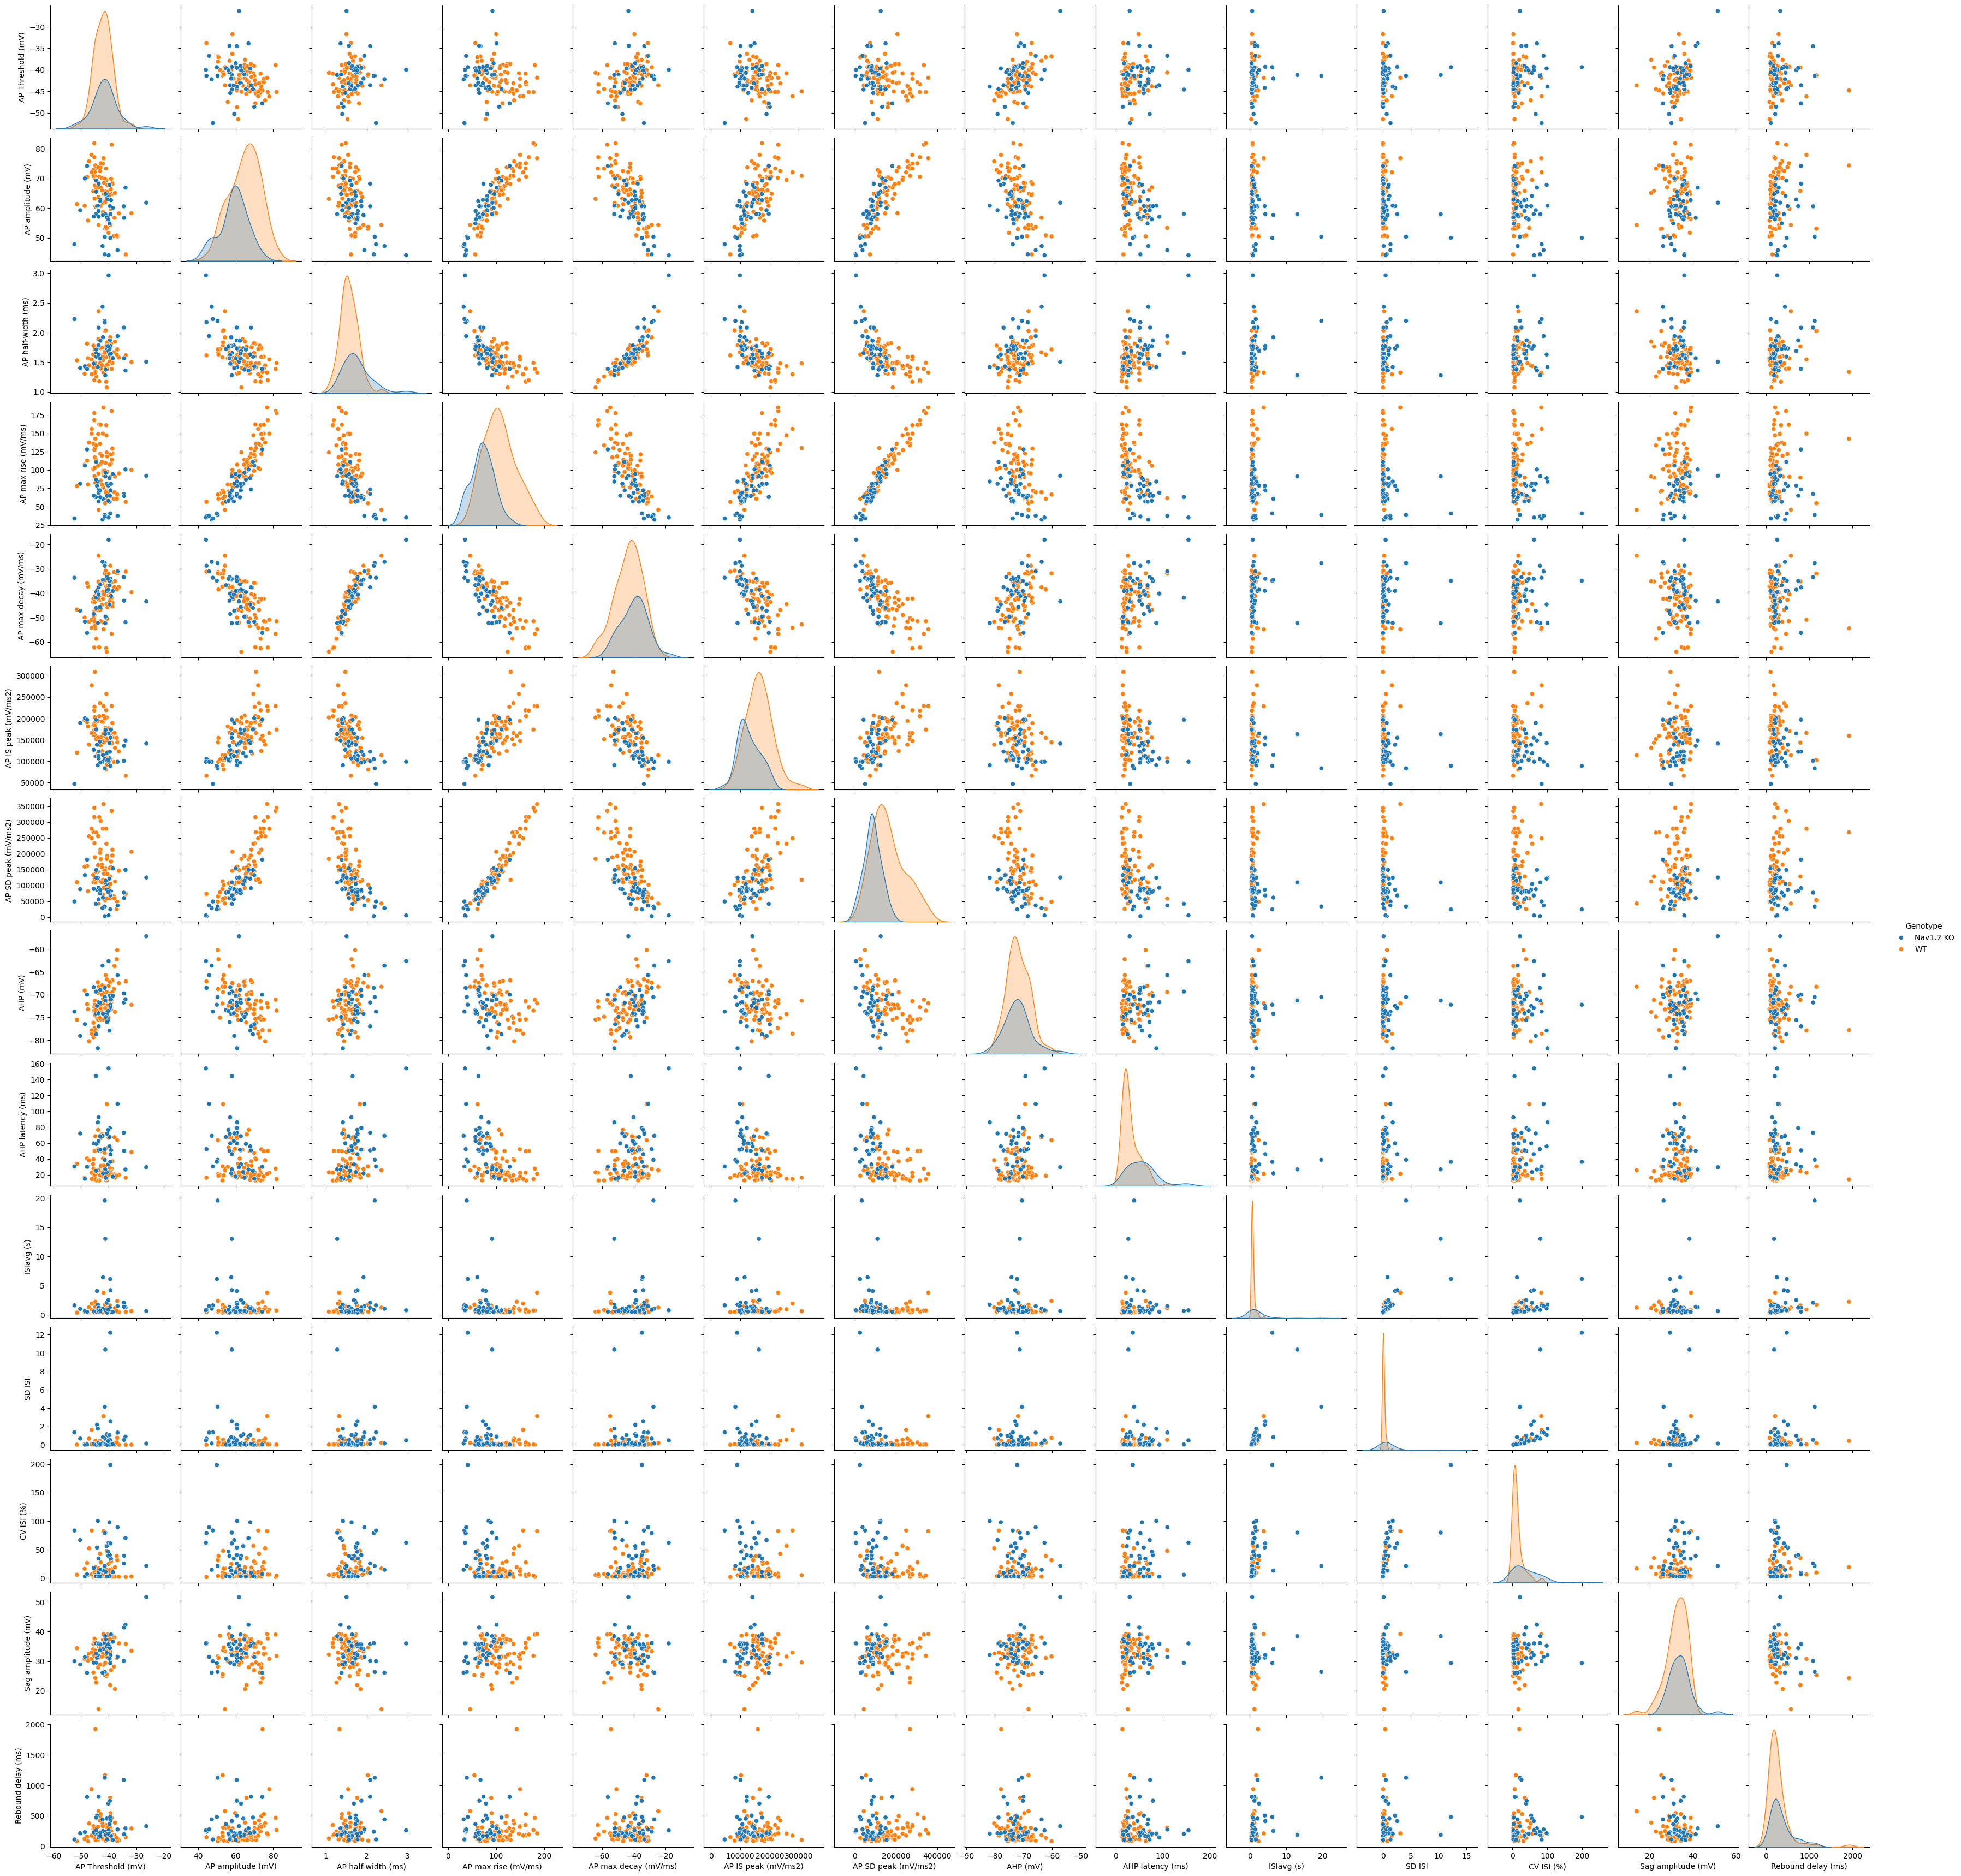

In [7]:
# Pairplot to visualize relationships
sns.pairplot(df_electro, hue="Genotype")

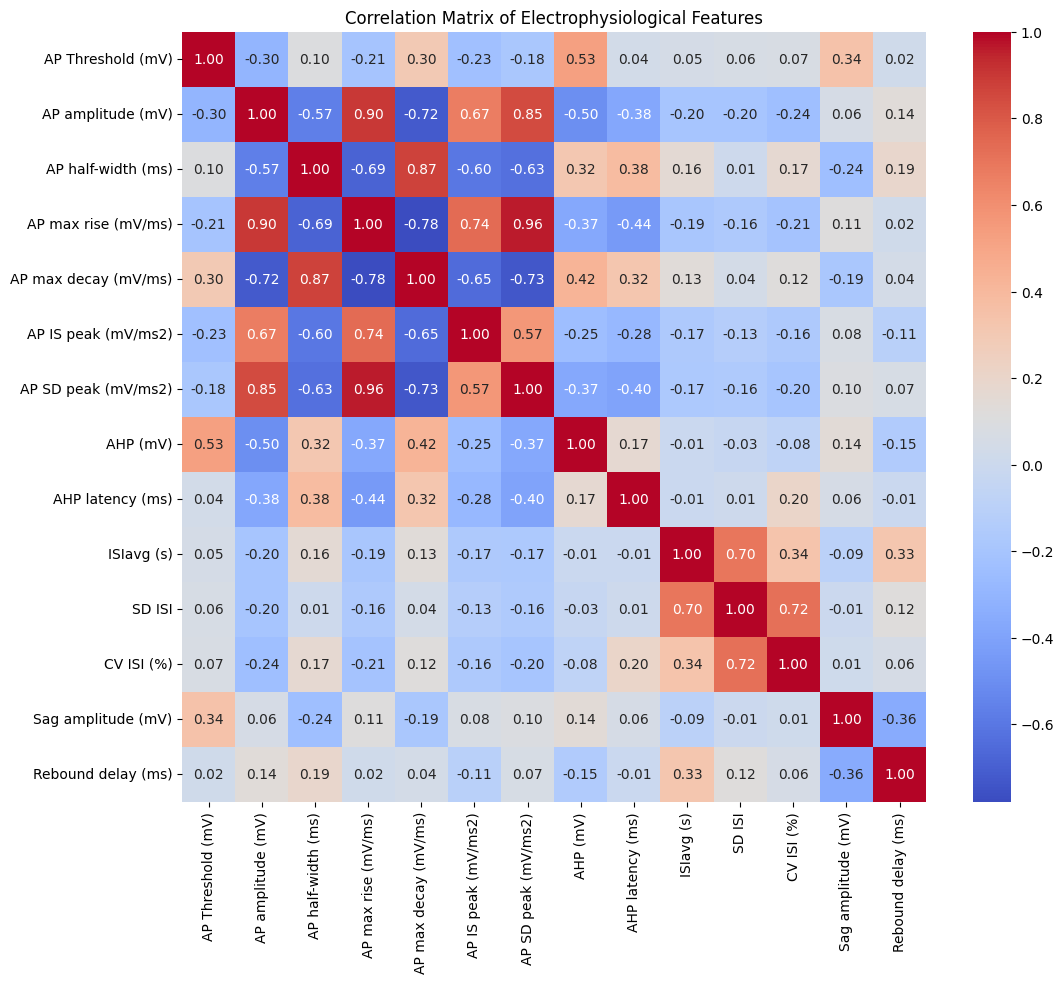

In [14]:
# Correlation matrix for electrophysiological features
ephys_features = df_electro.select_dtypes(include=[np.number])
correlation_matrix = ephys_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Electrophysiological Features')
plt.show()

In [15]:
ephys_features

,AP Threshold (mV),AP amplitude (mV),AP half-width (ms),AP max rise (mV/ms),AP max decay (mV/ms),AP IS peak (mV/ms2),AP SD peak (mV/ms2),AHP (mV),AHP latency (ms),ISIavg (s),SD ISI,CV ISI (%),Sag amplitude (mV),Rebound delay (ms)
Neuron ID,,,,,,,,,,,,,,
2023_03_16_Cell1,-43.70,63.710302,1.887600,95.216259,-35.265140,154140.0,115970.0,-73.777698,51.625000,0.450,0.02530,5.622222,31.200,113.00
2023_03_16_Cell2,-45.60,65.617502,1.629243,102.064706,-43.596663,162590.0,133510.0,-76.146296,33.474998,0.489,0.01080,2.208589,34.000,166.00
2023_03_16_Cell5,-41.30,53.051099,2.026359,54.730751,-31.987254,102220.0,53600.0,-68.268097,30.525002,1.748,0.16900,9.668192,25.300,1165.00
2023_03_16_Cell6,-45.13,70.165701,1.399011,127.329260,-48.958346,227490.0,233570.0,-77.373103,17.974998,0.814,0.06460,7.936118,32.500,299.00
2023_03_21_Cell1,-33.80,44.417899,1.614586,56.603502,-31.157279,65717.0,73545.0,-67.112604,16.224998,0.501,0.00983,1.962076,35.800,152.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025_03_27_C5,-40.57,56.857400,1.775143,64.729817,-33.369835,101470.0,86930.0,-76.051900,71.625000,0.394,0.01050,2.664975,34.981,115.79
2025_04_01_C1,-39.54,60.625501,1.867546,64.987391,-34.997333,122000.0,81920.0,-70.224203,78.875000,1.255,0.50800,40.478088,34.400,747.63
2025_04_01_C4,-40.15,56.187801,1.770165,57.971127,-34.113519,103115.0,79420.0,-73.597802,76.574997,0.885,0.41000,46.327684,35.676,209.20


In [16]:
# drop variables in time domain 
ephys_features = ephys_features.drop(columns=['AP half-width (ms)', 'AHP latency (ms)', 'ISIavg (s)', 'SD ISI', 'Rebound delay (ms)', 'CV ISI (%)'])
ephys_features

,AP Threshold (mV),AP amplitude (mV),AP max rise (mV/ms),AP max decay (mV/ms),AP IS peak (mV/ms2),AP SD peak (mV/ms2),AHP (mV),Sag amplitude (mV)
Neuron ID,,,,,,,,
2023_03_16_Cell1,-43.70,63.710302,95.216259,-35.265140,154140.0,115970.0,-73.777698,31.200
2023_03_16_Cell2,-45.60,65.617502,102.064706,-43.596663,162590.0,133510.0,-76.146296,34.000
2023_03_16_Cell5,-41.30,53.051099,54.730751,-31.987254,102220.0,53600.0,-68.268097,25.300
2023_03_16_Cell6,-45.13,70.165701,127.329260,-48.958346,227490.0,233570.0,-77.373103,32.500
2023_03_21_Cell1,-33.80,44.417899,56.603502,-31.157279,65717.0,73545.0,-67.112604,35.800
...,...,...,...,...,...,...,...,...
2025_03_27_C5,-40.57,56.857400,64.729817,-33.369835,101470.0,86930.0,-76.051900,34.981
2025_04_01_C1,-39.54,60.625501,64.987391,-34.997333,122000.0,81920.0,-70.224203,34.400
2025_04_01_C4,-40.15,56.187801,57.971127,-34.113519,103115.0,79420.0,-73.597802,35.676


In [17]:
# Check normal disrtibution on non-time features
normality_results = {}
for col in ephys_features.columns:
    stat, p = shapiro(ephys_features[col])
    normality_results[col] = (stat, p)
normality_results

{'AP Threshold (mV)': (np.float64(0.9665665041251429),
  np.float64(0.00596769002679214)),
 'AP amplitude (mV)': (np.float64(0.9912081649783324),
  np.float64(0.6809271623065406)),
 'AP max rise (mV/ms)': (np.float64(0.9740306339730083),
  np.float64(0.0256124329377227)),
 'AP max decay (mV/ms)': (np.float64(0.9890827875022483),
  np.float64(0.49463168198822327)),
 'AP IS peak (mV/ms2)': (np.float64(nan), np.float64(nan)),
 'AP SD peak (mV/ms2)': (np.float64(0.9365877293261784),
  np.float64(4.0036846346428366e-05)),
 'AHP (mV)': (np.float64(0.9799018369450481), np.float64(0.08425898001167839)),
 'Sag amplitude (mV)': (np.float64(0.9553119947248335),
  np.float64(0.0007826284568357724))}

In [18]:
# t-test on normal features
t_test_results = {}
for col in ephys_features.columns:
    wt_data = df_electro[df_electro['Genotype'] == 'WT'][col]
    ko_data = df_electro[df_electro['Genotype'] == 'Nav1.2 KO'][col]
    stat, p = ttest_ind(wt_data, ko_data)
    t_test_results[col] = (stat, p)
t_test_results

{'AP Threshold (mV)': (np.float64(-0.7891455407485057),
  np.float64(0.4316943171698362)),
 'AP amplitude (mV)': (np.float64(3.80540664978505),
  np.float64(0.00023124148842225422)),
 'AP max rise (mV/ms)': (np.float64(6.069917445570909),
  np.float64(1.786115603729292e-08)),
 'AP max decay (mV/ms)': (np.float64(-2.2097371716470633),
  np.float64(0.029157693194149917)),
 'AP IS peak (mV/ms2)': (np.float64(nan), np.float64(nan)),
 'AP SD peak (mV/ms2)': (np.float64(5.600845804256486),
  np.float64(1.5427065248087688e-07)),
 'AHP (mV)': (np.float64(0.19044479443164208), np.float64(0.8493053655182314)),
 'Sag amplitude (mV)': (np.float64(-1.4983177228647144),
  np.float64(0.13686396428142475))}

In [19]:
# Significant differences
significant_features = {col: res for col, res in t_test_results.items() if res[1] < 0.05}
significant_features

{'AP amplitude (mV)': (np.float64(3.80540664978505),
  np.float64(0.00023124148842225422)),
 'AP max rise (mV/ms)': (np.float64(6.069917445570909),
  np.float64(1.786115603729292e-08)),
 'AP max decay (mV/ms)': (np.float64(-2.2097371716470633),
  np.float64(0.029157693194149917)),
 'AP SD peak (mV/ms2)': (np.float64(5.600845804256486),
  np.float64(1.5427065248087688e-07))}

In [20]:
# Multiple testing correction on significant features (Bonferroni)
p_values = [res[1] for res in significant_features.values()]
reject, pvals_corrected, _, _ = multipletests(p_values, method='bonferroni')
corrected_results = dict(zip(significant_features.keys(), zip([res[0] for res in significant_features.values()], pvals_corrected, reject)))
corrected_results

{'AP amplitude (mV)': (np.float64(3.80540664978505),
  np.float64(0.0009249659536890169),
  np.True_),
 'AP max rise (mV/ms)': (np.float64(6.069917445570909),
  np.float64(7.144462414917168e-08),
  np.True_),
 'AP max decay (mV/ms)': (np.float64(-2.2097371716470633),
  np.float64(0.11663077277659967),
  np.False_),
 'AP SD peak (mV/ms2)': (np.float64(5.600845804256486),
  np.float64(6.170826099235075e-07),
  np.True_)}

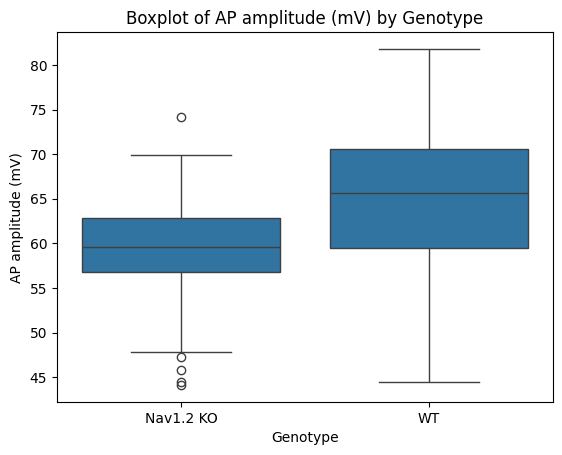

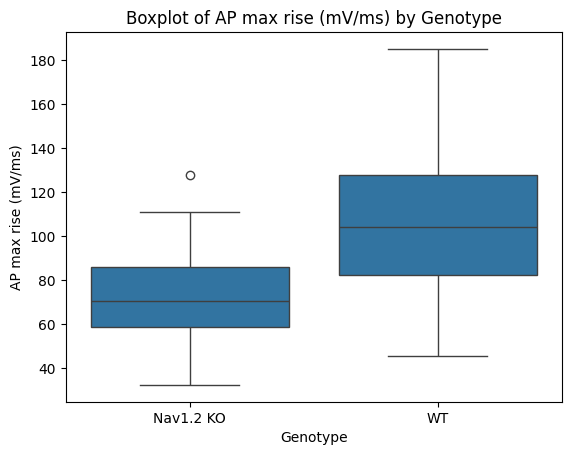

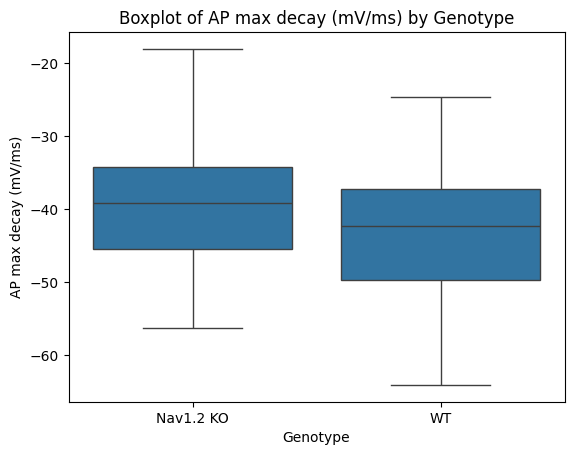

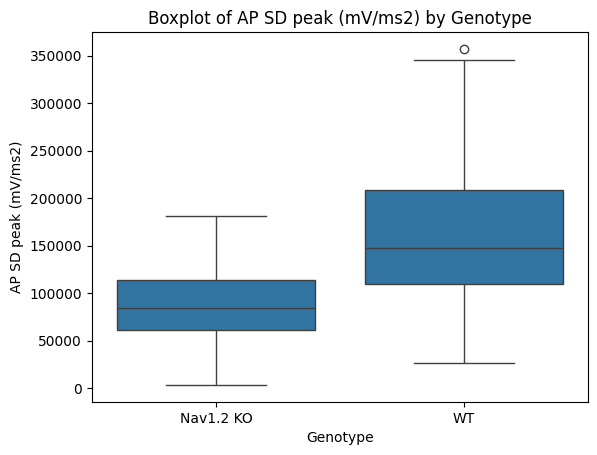

In [21]:
# Visualise significant features
for feature in significant_features.keys():
    plt.figure()
    sns.boxplot(x='Genotype', y=feature, data=df_electro)
    plt.title(f'Boxplot of {feature} by Genotype')
    plt.show()

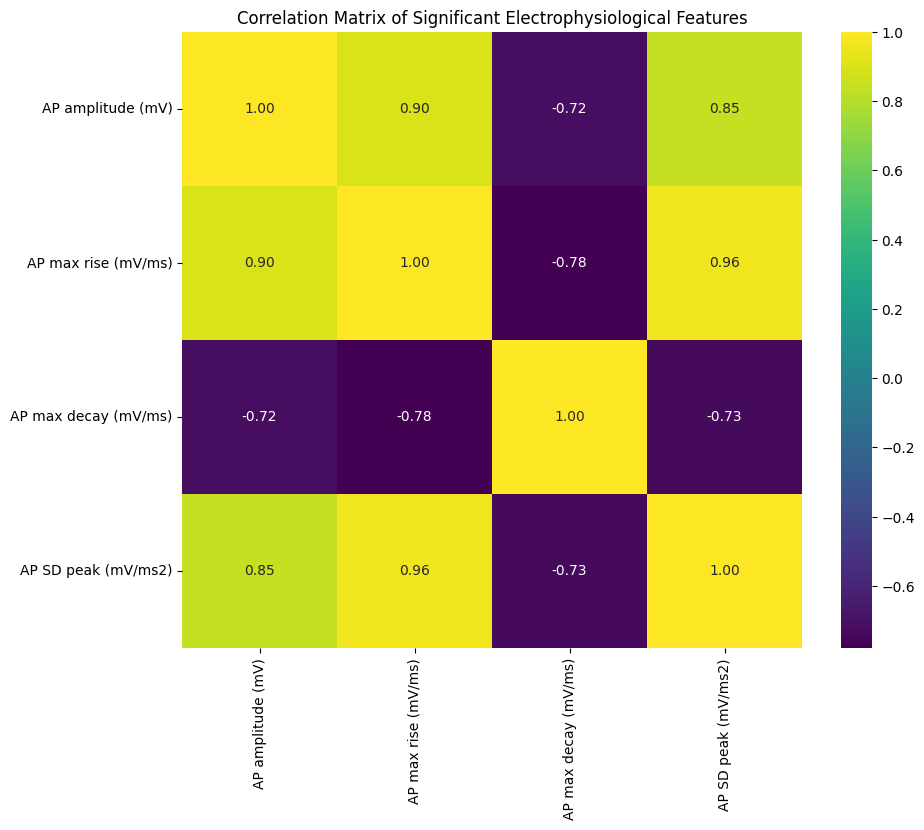

In [22]:
# correlation matrix significant features
significant_feature_names = list(significant_features.keys())
significant_ephys_features = ephys_features[significant_feature_names]
correlation_matrix_significant = significant_ephys_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_significant, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix of Significant Electrophysiological Features')
plt.show()

In [23]:
# Create dataframe with significant features means by genotype
significant_means = df_electro.groupby('Genotype')[significant_feature_names].mean().reset_index()
significant_means

/tmp/ipykernel_934/721855581.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  significant_means = df_electro.groupby('Genotype')[significant_feature_names].mean().reset_index()


,Genotype,AP amplitude (mV),AP max rise (mV/ms),AP max decay (mV/ms),AP SD peak (mV/ms2)
0,Nav1.2 KO,59.051661,71.304725,-39.690184,85179.631579
1,WT,64.968122,107.336058,-43.404215,162510.789474


In [25]:
# Define the selected features based on analysis and literature
electrophysiological_features = [
    'AP amplitude (mV)', 
    'AP max rise (mV/ms)', 
    'AP max decay (mV/ms)', 
    'AP SD peak (mV/ms2)', 
    'ISIavg (s)',
    'AHP latency (ms)'
]

morphological_features = [
    'Overall dendritic length',
    'Overall dendritic complexity'
]

model_parameters = [
    'gNA',  
    'gCa',
    'gKDr',
    'gKCa',
]

print(f"Electrophysiological features (based on univariate feature selection and literature): {electrophysiological_features}")
print(f"Morphological features (based on literature): {morphological_features}")
print(f"Model parameters of interest: {model_parameters}")

Electrophysiological features (based on univariate feature selection and literature): ['AP amplitude (mV)', 'AP max rise (mV/ms)', 'AP max decay (mV/ms)', 'AP SD peak (mV/ms2)', 'ISIavg (s)', 'AHP latency (ms)']
Morphological features (based on literature): ['Overall dendritic length', 'Overall dendritic complexity']
Model parameters of interest: ['gNA', 'gCa', 'gKDr', 'gKCa']
